In [52]:
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

max_weight = 750
weights = [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
values = [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]

iteration_values = [] # 記錄每次迭代的最佳價值

def simulated_annealing(max_weight, weights, values):
    # 初始解是所有物品都不放入背包
    solution = [0] * len(weights)
    best_solution = solution[:]
    best_value = 0
    T = 1
    T_min = 0.00001
    alpha = 0.9
    iterations = 500

    for i in range(iterations):
        # 隨機選擇一個物品，並改變它的放入狀態
        idx = random.randint(0, len(solution) - 1)
        solution[idx] = 1 - solution[idx]

        # 計算解的重量和價值
        weight = sum([solution[i] * weights[i] for i in range(len(solution))])
        value = sum([solution[i] * values[i] for i in range(len(solution))])

        # 如果解的重量超出了背包的承重，則恢復原來的解
        if weight > max_weight:
            solution = best_solution[:]
        else:
            # 檢查這個解是否是目前最佳解
            if value > best_value:
                best_value = value
                best_solution = solution[:]
            # 根據溫度和解的價值差，決定是否接受解
            delta = value - best_value
            #p = 2.71828 ** (-delta / T)
            p = np.exp(-delta / T)
            if random.uniform(0, 1) > p:
                solution = best_solution[:]

        # 更新溫度
        T = T * alpha
        if T < T_min:
            T = T_min
        iteration_values.append(best_value)
    
    return best_solution

result = simulated_annealing(max_weight, weights, values)

#計算最終的價值
total_value = sum([values[i] for i in range(len(solution)) if result[i] == 1])
#印出最終的物品狀態和價值
print(result)
print(total_value)

[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
1456


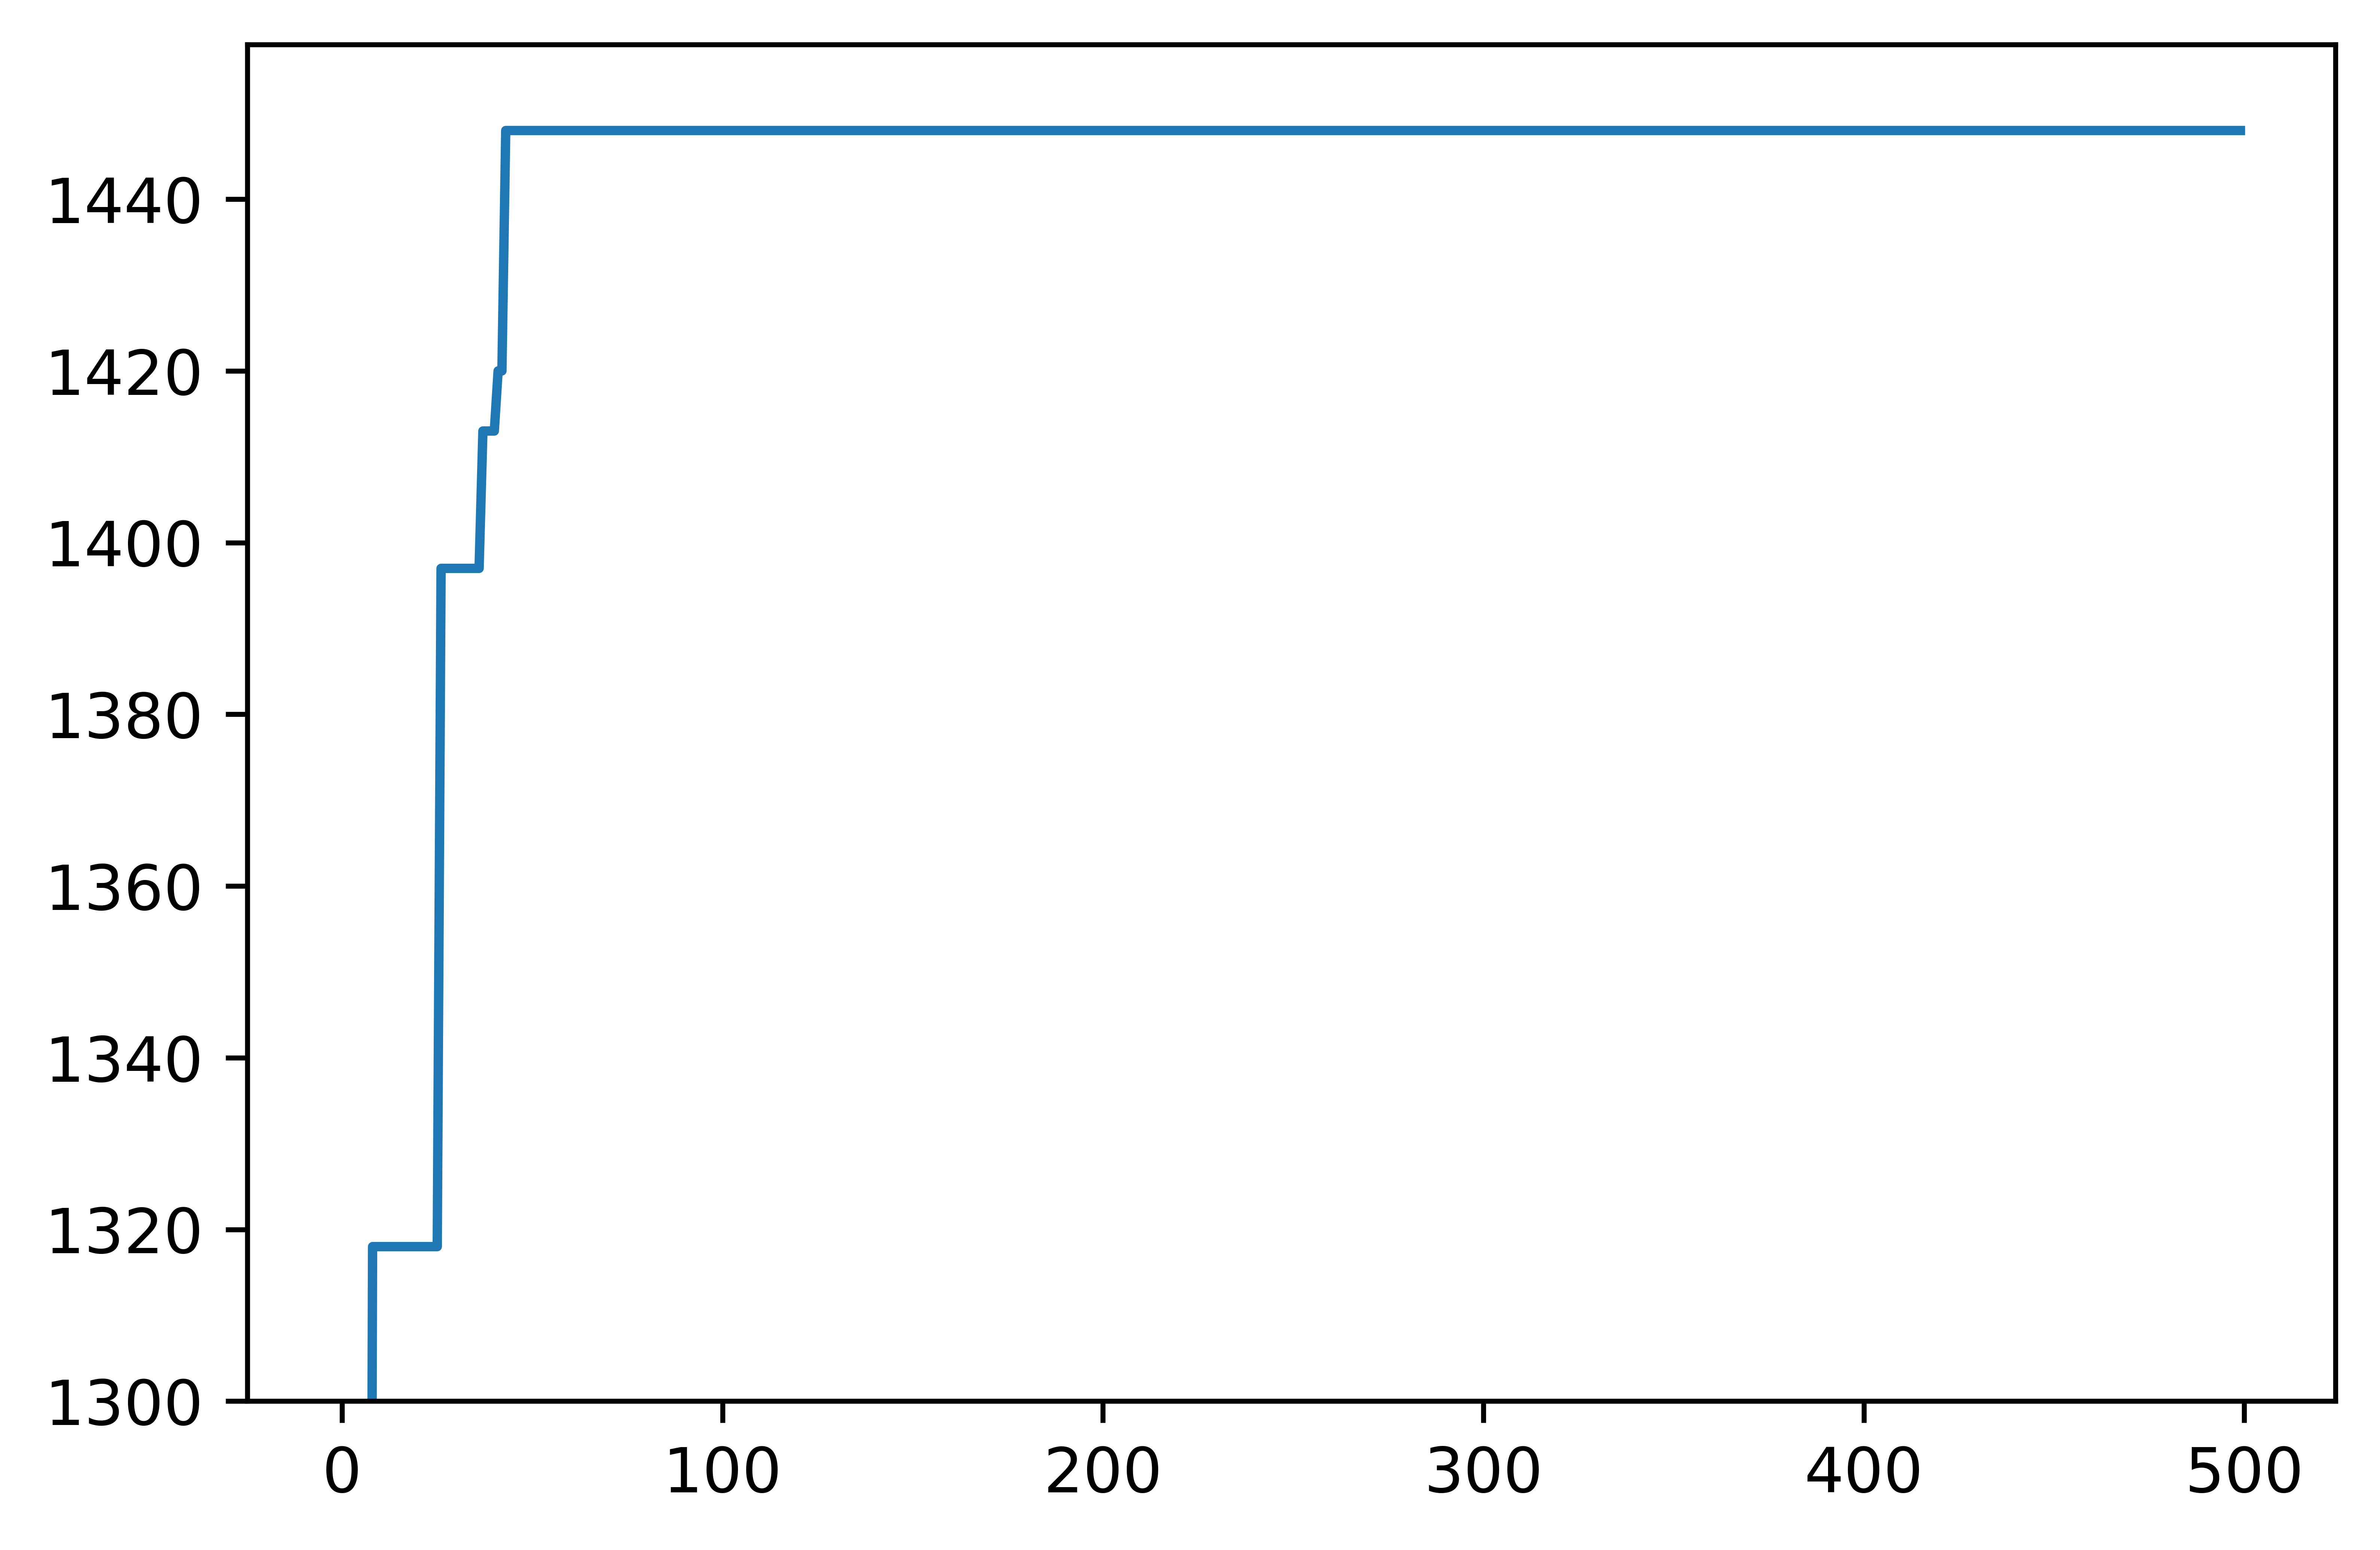

In [53]:
#畫出收斂圖
plt.figure(dpi=1200)
plt.plot(value_history)
plt.ylim([1300, 1458])
plt.show()